# Testing detection of seeded events

Load in the finding code. 

In [15]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook

In [ ]:
from random import randint
pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')

Minframe= FindMinFrame(data)

In [ ]:
valid = np.where(~np.isnan(ObjectMask(data,Minframe)))
positionx = randint(0,valid[0].shape[0])
Start = randint(0,data.shape[0])

In [2]:
funny_keywords = {'1CTYP4': 'CTYPE1',
                  '2CTYP4': 'CTYPE2',
                  '1CRPX4': 'CRPIX1',
                  '2CRPX4': 'CRPIX2',
                  '1CRVL4': 'CRVAL1',
                  '2CRVL4': 'CRVAL2',
                  '1CUNI4': 'CUNIT1',
                  '2CUNI4': 'CUNIT2',
                  '1CDLT4': 'CDELT1',
                  '2CDLT4': 'CDELT2',
                  '11PC4': 'PC1_1',
                  '12PC4': 'PC1_2',
                  '21PC4': 'PC2_1',
                  '22PC4': 'PC2_2'}
mywcs = {}
for oldkey, newkey in funny_keywords.items():
    mywcs[newkey] = hdu[1].header[oldkey]
wcs = WCS(mywcs)

In [853]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook
from random import randint
save = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/Kilonova/'
D = np.arange(1,110,10)*1e6 # distance in Mpc

pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')


D = [60e6]
Result = []
Fakes = []
Masked = []
starts = []
positions = []
datas = []
for distance in tqdm_notebook(D):
    Run = []
    Run_fakes = []
    Run_masked = []
    Kilonova, Kilotime = K2Kilonova(3,distance)
    Kilonova = Kilonova[0,Kilotime > 0]
    for i in tqdm_notebook(range(data.shape[1]),leave = False):
        for j in tqdm_notebook(range(data.shape[2]),leave = False):
        
            Position = [i,j]
            positions.append(Position)
            Start = 1000#randint(0,data.shape[0]-1)
            starts.append(Start)
            if Kilonova.shape[0] > data[Start:].shape[0]:
                ReKilonova = Kilonova[:data[Start:].shape[0]]
            else:
                temp = np.zeros(data[Start:].shape[0])
                temp[:Kilonova.shape[0]] = Kilonova
                ReKilonova = temp
            testdata = np.copy(data)
            testdata[Start:,Position[0],Position[1]] = testdata[Start:,Position[0],Position[1]] + ReKilonova
            datas.append(testdata)
            detec, falsedetec, maskeddetec = K2tranPix(testdata,time,Qual,wcs,Position,Start)
            Run.append(detec)
            Run_fakes.append(falsedetec)
            Run_masked.append(maskeddetec)
    Result.append(Run)
    Fakes.append(Run_fakes)
    Masked.append(Run_masked)
Result = np.array(Result)
Fakes = np.array(Fakes)
Masked = np.array(Masked)



HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1136, 1201, 1205, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1201 1201]
T1
T1
[  39   54  101 1136 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
161.634792769
23.6784673714
0.461635671011
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
173.149430015
32.3427739437
0.195849784452
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 176

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
165.846672583
26.2401260782
1.65105687582
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
185.112950394
40.5404040787
4.04465798967
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1029, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1029]
T1
TL1
227.153805816
55.3089957765
5.6322442696
TLF
[  39   54  101 1029 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920,

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
166.479106341
24.8222557554
2.87599737752
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1456, 1460, 1480, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 764 1030 1340 1343 1460]
T1
T1
TL1
189.977295457
38.8386289233
7.4939807854
TLF
T1
T1
TL1
207.982203485
113.537142728
19.4007628925
TLF
T1
TL1
44.1834228002
31.4258677302
5.63239164334
TLF
[  39   54  101 1030 1343 1460 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 956, 959, 1029, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 428  585  668  680  717  76

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
166.586274476
24.3762215063
3.11717667081
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 668  764  920 1030 1340 1343]
T1
T1
T1
TL1
206.193222262
85.6122269552
58.6022975482
TLF
T1
TL1
194.086305362
43.9436504118
7.49103840245
TLF
T1
T1
TL1
199.314124948
104.894800896
18.5602942806
TLF
[  39   54  101  920 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1340, 1343, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 428  585  680  717  764  793  920  934  953 1340 1343 1455 1762]
T1
T1
TL1
86

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
162.998929465
15.9283021808
2.61735090622
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 668  764  920 1030 1340 1340 1343]
T1
T1
T1
TL1
206.193222371
85.6122269552
58.6022975482
TLF
T1
TL1
187.006612051
31.4335434159
5.49579602946
TLF
T1
T1
T1
TL1
207.982203096
113.537142728
19.4007628925
TLF
[  39   54  101  920 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 428  476  585  668  680  71

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
155.459046407
17.6428416703
3.61429872123
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1255, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 920 1030 1255 1340]
T1
TL1
206.193221991
85.6122269552
58.6022975482
TLF
T1
TL1
182.452720731
35.0074764877
5.00963592576
TLF
T1
TL1
155.887395774
73.1003900017
47.4378505973
T1
[  39   54  101  920 1030 1255 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 920  920 1040 1040 1040 1040]
T1
TL1
206.193221661
85.6122269552
58.6022975482
T

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1030, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1030]
T1
TL1
153.965949258
11.3940656175
3.62180865996
TLF
[  39   54  101 1030 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1040]
T1
TL1
183.096337129
24.1819178813
4.41702068484
TLF
[  39   54  101 1040 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[ 920 1040 1040]
T1
TL1
T1
T1
TL1
213.678748548
43.9630437679
7.01785298352
TLF
[  39   54  101 1040 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 27

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1031, 1243, 1246, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1031]
T1
TL1
167.257155581
11.2862817704
3.41114990533
TLF
[  39   54  101 1031 1243 1343 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1040]
T1
TL1
189.483279701
25.255585163
4.69672973942
TLF
[  39   54  101 1040 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1040]
T1
TL1
200.105488509
42.68347594
5.99915808866
TLF
[  39   54  101 1040 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 29

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1136, 1201, 1205, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
[  39   54  101 1136 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1040]
T1
TL1
179.495627284
12.512160182
2.8975880831
TLF
[  39   54  101 1040 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1040, 1235, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1040]
T1
TL1
174.693370521
27.0871548939
3.10853576112
TLF
[  39   54  101 1040 2780 2857 2857 3067 3147]
[39, 54, 69, 101, 136, 175, 428, 474, 476, 585, 668, 680, 717, 764, 793, 920, 934, 953, 1031, 1280, 1340, 1343, 1364, 1434, 1455, 1662, 1762, 2297, 2300, 2585, 2588, 2780, 2857, 2932, 3067, 3147]
2
[1031]
T1
TL1
167.498236445
31.3154143284
1.956

In [860]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix_test.py'
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/KasenKilonovaSeed.ipynb'
%matplotlib notebook
from tqdm import tnrange, tqdm_notebook
from random import randint
save = '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/Injections/Kilonova/'
D = np.arange(1,110,10)*1e6 # distance in Mpc

pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')


D = [30e6]
Result = []
Fakes = []
Masked = []
starts = []
positions = []
datas = []
for distance in tqdm_notebook(D):
    Run = []
    Run_fakes = []
    Run_masked = []
    Kilonova, Kilotime = K2Kilonova(3,distance)
    Kilonova = Kilonova[0,Kilotime > 0]
    for i in tqdm_notebook(range(100),leave = False):
        
        xposition = randint(0,data.shape[1]-1)
        yposition = randint(0,data.shape[2]-1)
        Position = [xposition,yposition]
        positions.append(Position)
        Start = 1000#randint(0,data.shape[0]-1)
        starts.append(Start)
        if Kilonova.shape[0] > data[Start:].shape[0]:
            ReKilonova = Kilonova[:data[Start:].shape[0]]
        else:
            temp = np.zeros(data[Start:].shape[0])
            temp[:Kilonova.shape[0]] = Kilonova
            ReKilonova = temp
        testdata = np.copy(data)
        testdata[Start:,Position[0],Position[1]] = testdata[Start:,Position[0],Position[1]] + ReKilonova
        detec, falsedetec, maskeddetec = K2tranPix(testdata,time,Qual,wcs,Position,Start)
        Run.append(detec)
        datas.append(testdata)
        Run_fakes.append(falsedetec)
        Run_masked.append(maskeddetec)
    Result.append(Run)
    Fakes.append(Run_fakes)
    Masked.append(Run_masked)
Result = np.array(Result)
Fakes = np.array(Fakes)
Masked = np.array(Masked)



HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

[439, 687, 726, 920, 1039, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
2
[ 920  920 1039]
T1
TL1
1041.52948989
344.635925871
445.90234957
T1
TL1
798.486630024
227.616213823
238.390184486
TLF
T1
TL1
[ 920 1340]
[439, 687, 726, 920, 1039, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
2
[ 687 1039 1039 1340]
T1
TL1
254.101219585
21.6841154294
5.68058520086
TLF
T1
T1
TL1
T1
TL1
200.841752678
34.0524886364
7.50960451662
TLF
[ 687 1340]
[439, 687, 726, 920, 1037, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
2
[ 439  920  920 1037 1242]
T1
TL1
1017.25814968
816.304254912
1059.29824695
T1
TL1
1141.16549324
602.768157662
941.317058763
T1
TL1
1041.52949154
344.635925871
445.90234957
T1
TL1
T1
TL1
1026.14418459
414.353954206
775.937180837
[1340]
[439, 687, 726, 920, 1072, 1141, 1194, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
[1340]
[439, 687, 726, 920, 1040, 1195, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
2
[1040]
T1
TL1
697.408173868
27.031467468
3.03483698498
TLF
[1040 1340]
[439, 687, 726, 920, 1072, 1

[439, 687, 726, 920, 1036, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
2
[ 920 1036]
T1
TL1
798.486631324
227.616213823
238.390184486
TLF
T1
TL1
[ 920 1340]
[439, 687, 726, 920, 1037, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
2
[ 439  726  920  920 1037 1242 1242 1348]
T1
TL1
1017.25815182
816.304254912
1059.29824695
T1
TL1
1050.73770591
715.816679736
1011.13672045
T1
TL1
967.652361653
494.847348792
753.806791203
T1
TL1
1141.16549641
602.768157662
941.317058763
T1
TL1
T1
TL1
T1
TL1
1026.14418594
414.353954206
775.937180837
T1
[1340]
[439, 687, 726, 920, 1039, 1202, 1205, 1242, 1340, 1348, 2391, 2489, 2587]
2
[ 687 1039 1039 1340]
T1
TL1
254.101216835
21.6841154294
5.68058520086
TLF
T1
TL1
664.931321705
37.7886181327
5.94555571815
TLF
T1
T1
TL1
[ 687 1039]
[439, 687, 726, 920, 1072, 1141, 1194, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
[1340]
[439, 687, 726, 920, 1072, 1141, 1194, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
[1340]
[439, 687, 726, 920, 1042, 1194, 1198, 1202, 1242, 1340, 134

[439, 687, 726, 920, 1042, 1194, 1202, 1242, 1340, 1348, 2391, 2489, 2683]
2
[1042]
T1
TL1
189.903522199
106.27318104
48.6875422896
[1340]
[439, 687, 726, 920, 1072, 1141, 1194, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
[1340]
[439, 687, 726, 920, 1039, 1202, 1242, 1340, 1348, 2391, 2489, 2587]
2
[1039]
T1
TL1
818.191577366
78.2320976199
0.293690051089
TLF
[1039 1340]



In [858]:
Masked[-1]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [861]:
print(Result-Masked)
print(Fakes)

[[ 0.  0.  0. -1.  1. -1.  1.  0.  0. -1.  1. -1.  0.  1.  0.  1.  1.  1.
   0.  1.  0.  0.  0.  1.  0.  1. -1. -1.  0.  1.  1. -1.  0.  0.  1.  1.
   1.  0. -1.  1.  0. -1.  1.  0.  1.  0.  0.  0.  0.  1. -1. -1.  1.  1.
  -1.  0. -1.  1.  0.  1.  0.  1.  1.  0.  1.  0. -1.  0.  0.  0.  0. -1.
  -1.  1. -1.  1. -1.  0.  1.  1. -1.  0.  1.  0. -1.  1.  1.  1.  1.  1.
   1. -1.  0.  0.  0.  0. -1.  0. -1.  1.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


<IPython.core.display.Javascript object>


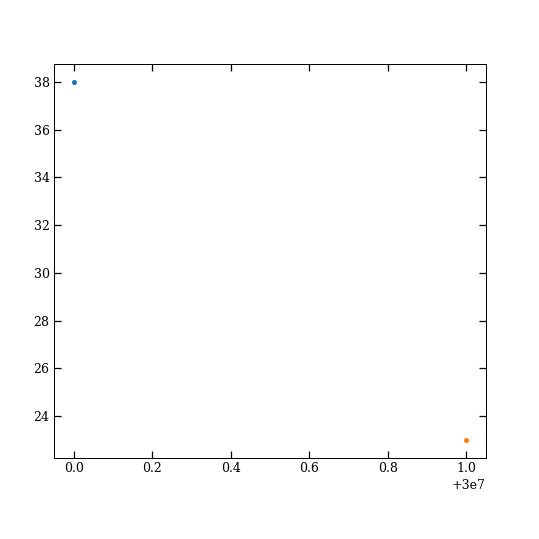

1.0

In [862]:
Percentage = np.nansum(Result, axis= 1)/Result.shape[1]
MaskedP = np.nansum(Masked, axis= 1)/Masked.shape[1]
plt.figure()
plt.plot(D,Percentage*100,'.')
plt.plot(D[0]+1,MaskedP*100,'.');
np.nansum(Fakes)

<IPython.core.display.Javascript object>


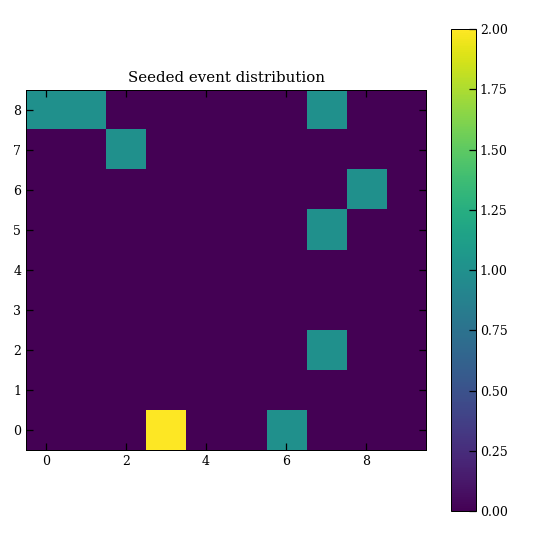

0.111111111111


<IPython.core.display.Javascript object>


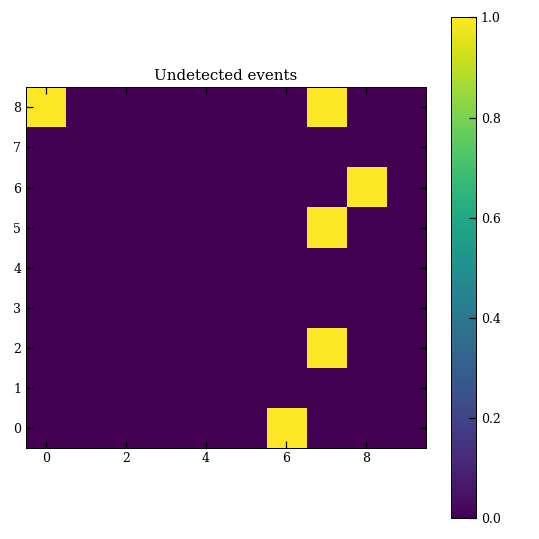

In [743]:
Sampled = np.zeros((data.shape[1],data.shape[2]))
Failed = np.zeros((data.shape[1],data.shape[2]))
Failtime = np.zeros(data.shape[0])

for i in range(len(positions)):
    Sampled[positions[i][0],positions[i][1]] += 1
    if Result[0,i] != 1:
        Failed[positions[i][0],positions[i][1]] += 1
        Failtime[starts[i]] += 1
    
plt.figure()
plt.title('Seeded event distribution')
plt.imshow(Sampled,origin = 'lower')
plt.tight_layout()
plt.colorbar();
print(np.mean(Sampled))

plt.figure()
plt.title('Undetected events')
plt.imshow(Failed,origin = 'lower')
plt.colorbar()
plt.tight_layout();


<IPython.core.display.Javascript object>


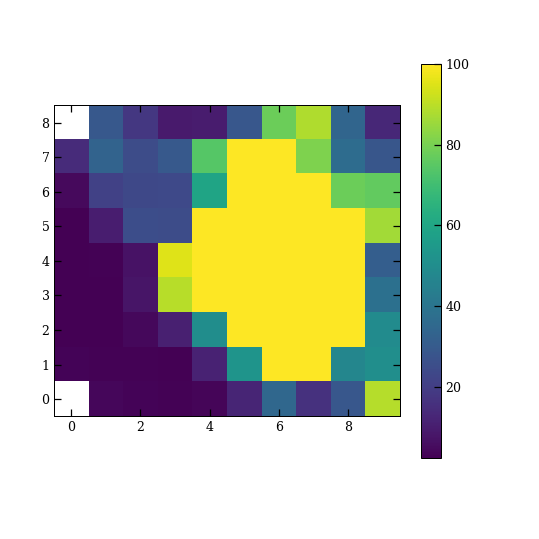

<IPython.core.display.Javascript object>


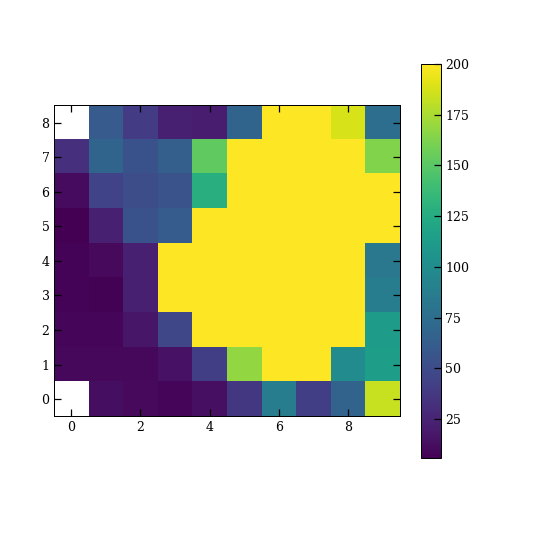

In [744]:
std = np.nanstd(data,axis= 0)
plt.figure()
plt.imshow(std,origin = 'lower',vmax=100)
plt.colorbar()
median = np.nanmedian(data,axis= 0)
plt.figure()
plt.imshow(2*std+median,origin = 'lower',vmax=200)
plt.colorbar()

In [ ]:
plt.figure()
testlight = np.nansum(data[:,4:6,1:3],axis= (1,2))
plt.plot(testlight,'.')

In [ ]:
plt.figure()
plt.plot(np.arange(0,data.shape[0],1),Failtime)

In [ ]:
starts[50:60]

In [ ]:
D[5]

In [43]:
%run '/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/K2TranPix.py'

from random import randint
pixfile = '/Volumes/TOSHIBA EXt/K2/c6/212200000/72000/ktwo212272599-c06_lpd-targ.fits.gz'
hdu = fits.open(pixfile)
dat = hdu[1].data
data = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
time = dat["TIME"] + 2454833.0
Qual = hdu[1].data.field('QUALITY')

Minframe= FindMinFrame(data)

D = 51000000.0
save = save + str(D)
Kilonova, Kilotime = K2Kilonova(3,D)
Kilonova = Kilonova[0,Kilotime > 0]
if Kilonova.shape[0] > data[starts[51]:].shape[0]:
    Kilonova = Kilonova[:data[starts[51]:].shape[0]]
else:
    temp = np.zeros(data[starts[51]:].shape[0])
    temp[:Kilonova.shape[0]] = Kilonova
    Kilonova = temp
testdata[starts[51]:,6,5] = data[starts[51]:,6,5] + Kilonova
thing = K2tranPix(testdata,time,Qual,wcs,pixfile,save)

IndexError: list index out of range

## Testing parabola fit

In [ ]:
lc = np.nansum(data[:,0:8,1:4],axis=(1,2))
eventtime = np.where((time >69.3+time[0]) & (time < 79.2+time[0]))[0]

In [ ]:
middle = np.where(np.nanmax(lc[eventtime[0]-1:eventtime[-1]+1]) == lc)[0][0]
x = np.arange(middle-2,middle+2+1,1)
x2 = np.arange(0,len(x),1)
y = lc[x]
p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)
p2 = np.poly1d(p1)
maxpoly = np.where(np.nanmax(p2(x)) == p2(x))[0][0]


In [ ]:
np.save('testdata.npy',testdata)

In [ ]:
np.where(time>=42+time[0])[0][0]

In [ ]:
p2 = np.poly1d(p1)
plt.figure()
plt.plot(x,lc[x],'.')
plt.plot(x,p2(x),'.')
plt.ylabel('Counts')
plt.xlabel('Time')
plt.title('Residual = ' + str(residual))

## other stuff


In [ ]:
lc = np.nansum(data*event,axis=(1,2))
eventtime = np.where((time >70.6+time[0]) & (time < 71.4+time[0]))[0]
middle = np.where(np.nanmax(lc[eventtime[0]-1:eventtime[-1]+1]) == lc)[0][0]
x = np.arange(middle-3,middle+3+1,1)
x2 = np.arange(0,len(x),1)
y = lc[x]
p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)

In [867]:

# coding: utf-8

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from scipy.signal import convolve2d
from scipy.signal import deconvolve
from scipy.ndimage.filters import convolve

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from glob import glob
import os

from tqdm import tnrange, tqdm_notebook
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from scipy.ndimage.filters import convolve

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from glob import glob
import os

from tqdm import tnrange, tqdm_notebook
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)



def DriftKiller(data,thrust):
    # The right value choice here is a bit ambiguous, though it seems that typical variations are <10.
    Drift = (abs(data[thrust+1]-data[thrust-1]) < 10)*1.0 
    Drift[Drift == 0] = np.nan
    j = 0
    for i in range(len(thrust)):
        data[j:thrust[i]] = data[j:thrust[i]]*Drift[i]
        j = thrust[i]
    return data

def FindMinFrame(data):
    # Finding the reference frame    
    n_steps = 12
    std_vec = np.zeros(n_steps)
    for i in range(n_steps):
        std_vec[i] = np.nanstd(data[i:-n_steps+i:n_steps,:,:] - data[i+n_steps*80,:,:])
    Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
    return Framemin

def ObjectMask(datacube,Framemin):
    # Make a mask of the target object, using the reference frame 
    Mask = datacube[Framemin,:,:]/(np.nanmedian(datacube[Framemin,:,:])+np.nanstd(datacube[Framemin,:,:]))
    Mask[Mask>=1] = np.nan
    Mask[Mask<1] = 1
    # Generate a second mask from remainder of the first. This grabs the fainter pixels around known sources
    Maskv2 = datacube[Framemin,:,:]*Mask/(np.nanmedian(datacube[Framemin,:,:]*Mask)+np.nanstd(datacube[Framemin,:,:]*Mask))
    Maskv2[Maskv2>=1] = np.nan
    Maskv2[Maskv2<1] = 1
    return Maskv2

def ThrustObjectMask(data,thrust):
    StartMask = np.ones((data.shape[1],data.shape[2]))
    for i in range(2):
        Start = data[thrust[:3]+1]*StartMask/(np.nanmedian(data[thrust[:3]+1]*StartMask, axis = (1,2))+np.nanstd(data[thrust[:3]+1]*StartMask, axis = (1,2)))[:,None,None]
        Start = Start >= 1
        temp = (np.nansum(Start*1, axis = 0) >=1)*1.0
        temp[temp>=1] = np.nan
        temp[temp<1] = 1
        StartMask = StartMask*temp


    EndMask = np.ones((data.shape[1],data.shape[2]))
    for i in range(2):
        End = data[thrust[-3:]+1]*EndMask/(np.nanmedian(data[thrust[-3:]+1]*EndMask, axis = (1,2))+np.nanstd(data[thrust[-3:]+1]*EndMask, axis = (1,2)))[:,None,None]
        End = End >= 1
        temp = (np.nansum(End*1, axis = 0) >=1)*1.0
        temp[temp>=1] = np.nan
        temp[temp<1] = 1
        EndMask = EndMask*temp
    
        
    Mask = np.nansum([np.ma.masked_invalid(StartMask).mask,np.ma.masked_invalid(EndMask).mask],axis=(0))*1.0
    Mask[Mask!=2] = 1
    Mask[Mask==2] = np.nan
    return Mask



def EventSplitter(events,Times,Masks):
    Events = []
    times = []
    mask = []
    for i in range(len(events)):
        # Check if there are multiple transients
        Coincident = Masks[events[i]]*framemask[events[i]]*1
        positions = np.where(Coincident == 1)
        if len(positions[0]) >1:
            for p in range(len(positions[0])):
                eventmask = np.zeros((Masks.shape[1],Masks.shape[2]))
                eventmask[positions[0][p],positions[1][p]] = 1
                eventmask = convolve(eventmask,np.ones((3,3)),mode='constant', cval=0.0)
                Similar = np.where((Masks[Times[i][0]:,:,:]*eventmask == eventmask).all(axis=(1,2)))[0]
                if len(np.where((np.diff(similar)<5) == False)[0]) < 1:
                    SimEnd = -1
                else:
                    SimEnd = np.where((np.diff(Similar)<5) == False)[0][0] - 1
                Similar = Similar[:SimEnd]
                if len(Similar) > 1:
                    timerange = [Similar[0]+Times[i][0]-1,Similar[-1]+Times[i][0]+1]
                    if len(timerange) > 1:
                        Events.append(events[i])
                        times.append(timerange)
                        mask.append(eventmask)
        else:
            Events.append(events[i])
            times.append(Times[i])
            mask.append(Masks[events[i]])
            

    return Events, times, mask

def Asteroid_fitter(Mask,Time,Data, plot = False):
    lc = np.nansum(Data*Mask,axis=(1,2))
    middle = np.where(np.nanmax(lc[Time[0]-1:Time[-1]+1]) == lc)[0][0]
    x = np.arange(middle-2,middle+2+1,1)
    x2 = np.arange(0,len(x),1)
    y = lc[[np.arange(middle-2,middle+2+1,1)]]
    p1, residual, _, _, _ = np.polyfit(x,y,2, full = True)
    p2 = np.poly1d(p1)
    maxpoly = np.where(np.nanmax(p2(x)) == p2(x))[0][0]
    if (residual < 5000) &  (abs(middle - x[maxpoly]) < 2):
        asteroid = True
        if plot == True:
            p2 = np.poly1d(p1)
            plt.figure()
            plt.plot(x,lc[x],'.')
            plt.plot(x,p2(x),'.')
            plt.ylabel('Counts')
            plt.xlabel('Time')
            plt.title('Residual = ' + str(residual))
            
    else:
        asteroid = False
        
    return asteroid 

def Smoothmax(interval,Lightcurve,qual):
    x = np.arange(interval[0],interval[1],1.)
    x[qual[interval[0]:interval[-1]]!=0] = np.nan 
    nbins = int(len(x)/5)
    y = np.copy(Lightcurve[interval[0]:interval[-1]])
    y[qual[interval[0]:interval[-1]]!=0] = np.nan
    
    if np.nansum(x) > 0:
        n, _ = np.histogram(x, bins=nbins,range=(np.nanmin(x),np.nanmax(x)))
        sy, _ = np.histogram(x, bins=nbins, weights=y,range=(np.nanmin(x),np.nanmax(x)))
        sy2, _ = np.histogram(x, bins=nbins, weights=y*y,range=(np.nanmin(x),np.nanmax(x)))
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        xrange = np.linspace(np.nanmin(x),np.nanmax(x),len(x))
        y_smooth = np.interp(xrange, (_[1:] + _[:-1])/2, mean)
        y_smooh_error = np.interp(xrange, (_[1:] + _[:-1])/2, std)

        temp = np.copy(y)
        temp[y_smooh_error>10] =np.nan

        maxpos = np.where(temp == np.nanmax(temp))[0]+interval[0]
    else:
        maxpos = 0
    return maxpos

def ThrusterElim(Events,Times,Masks,Firings,Quality,qual,Data,Real_position):
    temp = []
    temp2 = []
    temp3 = []
    asteroid = []
    asttime = []
    astmask = []
    for i in range(len(Events)):
        Range = Times[i][-1] - Times[i][0]
        if (Range > 0) & (Range/Data.shape[0] < 0.8) & (Times[i][0] > 5): 
            if (Real_position*Masks[i]).any():
                print('T1')
            begining = Firings[(Firings >= Times[i][0]-3) & (Firings <= Times[i][0]+1)]
            if len(begining) == 0:
                begining = Quality[(Quality >= Times[i][0]-1) & (Quality <= Times[i][0]+1)]
            end = Firings[(Firings >= Times[i][-1]-1) & (Firings <= Times[i][-1]+3)]
            if len(end) == 0:
                end = Quality[(Quality >= Times[i][-1]-1) & (Quality <= Times[i][-1]+1)]
            eventthrust = Firings[(Firings >= Times[i][0]) & (Firings <= Times[i][-1])]
            
            if (~begining.any() & ~end.any()) & (len(eventthrust) < 3):
                
                if Asteroid_fitter(Masks[i],Times[i],Data):
                    asteroid.append(Events[i])
                    asttime.append(Times[i])
                    astmask.append(Masks[i])
                else:
                    temp.append(Events[i])
                    temp2.append(Times[i])
                    temp3.append(Masks[i])
                    if (Real_position*Masks[i]).any():
                        print('TSF')
            elif len(eventthrust) >= 3:
                if (Real_position*Masks[i]).any():
                    print('TL1')
                if begining.shape[0] == 0:
                    begining = 0
                else:
                    begining = begining[0]   
                if end.shape[0] == 0:
                    end = Times[i][-1] + 10
                else:
                    end = end[0]
                LC = np.nansum(Data*Masks[i], axis = (1,2))
                maxloc = Smoothmax(Times[i],LC,qual)

                if ((maxloc > begining) & (maxloc < end)): 
                    postmean = np.nanmedian(LC[eventthrust[(Qual[eventthrust+1]==0)]+1])
                    Outsidethrust = Firings[(Firings < Times[i][0]) | (Firings > Times[i][-1]+20)]
                    Outsidemean = np.nanmedian(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                    Outsidestd = np.nanstd(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                    if (Real_position*Masks[i]).any():
                        print(postmean)
                        print(Outsidemean)
                        print(Outsidestd)
                    if  postmean > Outsidemean+3*Outsidestd:
                        temp.append(Events[i])
                        temp2.append(Times[i])
                        temp3.append(Masks[i])
                        if (Real_position*Masks[i]).any():
                            print('TLF')

    events = np.array(temp)
    eventtime = np.array(temp2)
    eventmask = np.array(temp3)
    print(events)
    return events, eventtime, eventmask, asteroid, asttime, astmask


def pix2coord(x,y,mywcs):
    wx, wy = mywcs.wcs_pix2world(x, y, 0)
    return np.array([float(wx), float(wy)])

def Get_gal_lat(mywcs,datacube):
    ra, dec = mywcs.wcs_pix2world(int(datacube.shape[1]/2), int(datacube.shape[2]/2), 0)
    b = SkyCoord(ra=float(ra)*u.degree, dec=float(dec)*u.degree, frame='icrs').galactic.b.degree
    return b





data = datas[1]
time = time
Qual = Qual
mywcs = mywcs 
Position = positions[1]
Time = starts[1]
try:
    datacube = data
    if datacube.shape[1] > 1 and datacube.shape[2] > 1:
        thrusters = np.where((Qual == 1048576) | (Qual == 1089568) | (Qual == 1056768) | (Qual == 1064960) | (Qual == 1081376) | (Qual == 10240) | (Qual == 32768) )[0]
        quality = np.where(Qual != 0)[0]
        #calculate the reference frame
        Framemin = FindMinFrame(datacube)
        # Apply object mask to data
        Mask = ThrustObjectMask(datacube,thrusters)

        Maskdata = datacube*Mask
        #Maskdata[Maskdata<0] = 0 

        #Motion control
        #Conv = convolve2d(np.ma.masked_invalid(Mask).mask, np.ones((3,3)), mode="same")
        #Maskdata = Maskdata*(Conv < 2)

        # Make a mask for the object to use as a test to eliminate very bad pointings
        obj = np.ma.masked_invalid(Mask).mask
        objmed = np.nanmedian(datacube[thrusters+1]*obj,axis=(0))
        objstd = np.nanstd(datacube[thrusters+1]*obj,axis=(0))
        Maskdata[(np.nansum(datacube*obj,axis=(1,2)) < np.nansum(objmed-3*objstd)),:,:] = np.nan

        #overflow = ((convolve(Maskdata[(np.nansum(datacube*obj,axis=(1,2)) > np.nansum(objmed+2*objstd)),:,:],
                              #np.ones((1,1,2)), mode='constant', cval=0.0)) >= 1)*1.0
        #overflow[overflow == 1] = np.nan
        #overflow[overflow == 0] = 1
        #Maskdata[(np.nansum(datacube*obj,axis=(1,2)) > np.nansum(objmed+2*objstd)),:,:] = overflow
        #Maskdata[Maskdata > 170000] = np.nan
        #Stdframe = np.ones(Maskdata.shape)
        framemask = np.zeros(Maskdata.shape)

        #Index = (np.nansum(datacube*obj,axis=(1,2))>np.nansum(objmed-3*objstd)) #((np.nanstd(Maskdata,axis=(1,2)) > np.nanmedian(stddist)) & ((Maskdata.shape[1]>1) & (Maskdata.shape[2]>1))) 
        #framemask[Index] = (Maskdata[Index]/(np.nanmedian(Maskdata[Index])+2*(np.nanstd(Maskdata[Index])))) >= 1
        framemask = ((Maskdata/abs(np.nanmedian(Maskdata, axis = (0))+3*(np.nanstd(Maskdata, axis = (0))))) >= 1)
        framemask[:,np.where(Maskdata > 170000)[1],np.where(Maskdata > 170000)[2]] = 0
        #Index = ((np.nanstd(Maskdata) > np.nanmedian(stddist)+np.nanstd(stddist)) & ((Maskdata.shape[1]==1) | (Maskdata.shape[2] == 1))) 

        # Identify if there is a sequence of consecutive or near consecutive frames that meet condtition 
        #Eventmask = (convolve(framemask,np.ones((5,3,3)),mode='constant', cval=0.0) >= 3)
        Real_position = np.zeros((data.shape[1],data.shape[2]))
        Real_position[Position[0],Position[1]] = 1


        Eventmask = (convolve(framemask,np.ones((1,3,3)),mode='constant', cval=0.0))*1
        Eventmask[~np.where((convolve(Eventmask,np.ones((5,1,1)),mode='constant', cval=0.0) >= 4))[0]] = 0
        Eventmask[Qual!=0,:,:] = False
        #print(np.where(np.nansum(Real_position*Eventmask,axis=(1,2))>0)[0])

        #Eventmask = DriftKiller(Eventmask*Maskdata,thrusters) > 0
        #Eventmask[np.isnan(Eventmask)] = 0
        Index = np.where(np.nansum(Eventmask*1, axis = (1,2))>0)[0]
        events = []
        eventtime = []
        while len(Index) > 1:
            similar = Index[((Eventmask[Index[0]]*Eventmask[Index]) == Eventmask[Index[0]]).all(axis = (1,2))]
            #similar = similar[np.append(True, np.diff(similar)<5)]
            if len(np.where((np.diff(similar)<5) == False)[0]) < 1:
                simEnd = -1
            else:
                simEnd = np.where((np.diff(similar)<5) == False)[0][0] - 1

            if len(similar) > 1:
                events.append(similar[0])
                temp = [similar[0],similar[-1]]
                eventtime.append(temp)
                temp = []
            for number in similar:
                if ((Eventmask[Index[0]]*Eventmask[number]) == Eventmask[number]).all():
                    Index = np.delete(Index, np.where(Index == number)[0])
        print(events)
        events, eventtime, eventmask = EventSplitter(events,eventtime,Eventmask)     
        #eventtime = np.array(eventtime)
        events = np.array(events)
        eventmask = np.array(eventmask)
        print(np.where(np.nansum(Real_position*eventmask,axis=(1,2))>0)[0])
        if (Real_position*eventmask).any():
            print('2')
            print(events[np.where(np.nansum(Real_position*eventmask,axis=(1,2))>0)[0]])


        # Eliminate events that begin/end within 2 cadences of a thruster fire

        events, eventtime, eventmask, asteroid, asttime, astmask = ThrusterElim(events,eventtime,eventmask,thrusters,quality,Qual,Maskdata,Real_position)
        #events = np.array(events)
        #eventtime = np.array(eventtime)
        #eventmask = np.array(eventmask)


        temp = []
        temp2 = []
        temp3 = []
        for i in range(len(eventtime)):
            if len(eventtime[i])>0:
                t = np.nansum(Eventmask[eventtime[i][0]:eventtime[i][-1],:,:]*1,axis=(1,2)) > 0
                print(np.sum(t)/t.shape[0])
                if np.sum(t)/t.shape[0] > 0.5:
                    temp.append(eventtime[i][:])
                    temp2.append(events[i])
                    temp3.append(eventmask[i])
        eventtime = np.array(temp)
        events = np.array(temp2)
        eventmask = np.array(temp3)


        temp = []
        for i in range(len(events)):
            if len(np.where(datacube[eventtime[i,0]:eventtime[i,-1]]*eventmask[i] > 170000)[0]) == 0:
                temp.append(i)
        eventtime = eventtime[temp]
        events = events[temp]
        eventmask = eventmask[temp]

        if (Real_position*eventmask).any():
            print('wut')
            print(events[np.where(np.nansum(Real_position*eventmask,axis=(1,2))>0)[0]])

        Real_position = np.zeros((data.shape[1],data.shape[2]))
        Real_position[Position[0],Position[1]] = 1
        detection = []
        if len(events) > 0:
            Overlap = (((Real_position*eventmask) == 1).any(axis = (1, 2))) & ((time[eventtime[:,0]] - time[Time]) < 4) & (Time < eventtime[:,0])

            detection = events[Overlap]

            false_detection = len(events[~Overlap])
        else:
            false_detection = 0.

        if len(detection) > 0:
            detect = 1.
        else:
            detect = 0.
        if np.nansum(obj*Real_position) > 0:
            Masked = 1.
        else:
            Masked = 0.

    else:
        detect = -1.
        false_detection = -1.
        Masked = -1.
except (OSError):
    detect = -1.
    false_detection = -1.
    Masked = -1.



[10, 34, 78, 154, 165, 226, 230, 246, 307, 382, 384, 410, 439, 468, 564, 623, 636, 667, 686, 687, 699, 725, 753, 829, 865, 872, 892, 916, 960, 975, 992, 1019, 1038, 1042, 1201, 1215, 1241, 1313, 1315, 1335, 1380, 1428, 1462, 1512, 1540, 1577, 1625, 1650, 1663, 1676, 1710, 1720, 1749, 1756, 1771, 1901, 1910, 1912, 1958, 2147, 2178, 2185, 2300, 2390, 2411, 2424, 2443, 2466, 2603, 2647, 2776, 2778, 2840, 2868, 2871, 2933, 2996, 3017, 3080, 3148, 3209, 3211, 3247, 3271, 3303, 3317, 3327, 3425, 3439, 3460, 3475, 3487, 3639, 3651, 3724, 3774, 3809]
[  1   3   8  10  12  18  20  21  26  27  32  36  46  47  48  58  60  63
  64  73  75  78  83  87  93 104 106]
2
[  34  154  307  384  439  564  623  636  686  687  865  916 1019 1038 1042
 1462 1540 1650 1663 1912 1958 2185 2411 2776 3080 3460 3651]
T1
TL1
31.1037461013
9.84455645084
6.62954456014
TLF
T1
TL1
177.449103981
72.5210664868
59.3497091769
T1
TL1
35.4518854618
10.2716408335
6.71298685217
TLF
T1
TL1
256.041930854
90.0316976979
60.3281610

In [868]:
events

array([1038, 1042])

In [852]:
eventtime

array([[ 38, 382],
       [101, 382],
       [174, 382]])

In [770]:
np.where(Real_position==1)

(array([4]), array([3]))

In [710]:

Events = events 
Times = eventtime
Masks = eventmask
Firings = thrusters
Quality = quality
qual =Qual
Data = datacube

temp = []
temp2 = []
temp3 = []
asteroid = []
asttime = []
astmask = []
for i in range(len(Events)):
    Range = Times[i][-1] - Times[i][0]
    if (Range > 0) & (Range/Data.shape[0] < 0.8) & (Times[i][0] > 5): 
        if (Real_position*Masks[i]).any():
            print('T1')
        begining = Firings[(Firings >= Times[i][0]-3) & (Firings <= Times[i][0]+1)]
        if len(begining) == 0:
            begining = Quality[(Quality >= Times[i][0]-1) & (Quality <= Times[i][0]+1)]
        end = Firings[(Firings >= Times[i][-1]-1) & (Firings <= Times[i][-1]+3)]
        if len(end) == 0:
            end = Quality[(Quality >= Times[i][-1]-1) & (Quality <= Times[i][-1]+1)]
        eventthrust = Firings[(Firings >= Times[i][0]) & (Firings <= Times[i][-1])]

        if (~begining.any() & ~end.any()) & (len(eventthrust) < 3):

            if Asteroid_fitter(Masks[i],Times[i],Data):
                asteroid.append(Events[i])
                asttime.append(Times[i])
                astmask.append(Masks[i])
            else:
                temp.append(Events[i])
                temp2.append(Times[i])
                temp3.append(Masks[i])
                if (Real_position*Masks[i]).any():
                    print('TSF')
        elif len(eventthrust) >= 3:
            if (Real_position*Masks[i]).any():
                print('TL1')
            if begining.shape[0] == 0:
                begining = 0
            else:
                begining = begining[0]   
            if end.shape[0] == 0:
                end = Times[i][-1] + 10
            else:
                end = end[0]
            LC = np.nansum(Data*Masks[i], axis = (1,2))
            maxloc = Smoothmax(Times[i],LC,qual)

            if ((maxloc > begining) & (maxloc < end)): 
                postmean = np.nanmedian(LC[eventthrust[(Qual[eventthrust+1]==0)]+1])
                Outsidethrust = Firings[(Firings < Times[i][0]) | (Firings > Times[i][-1]+20)]
                Outsidemean = np.nanmedian(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                Outsidestd = np.nanstd(LC[(Outsidethrust[(qual[Outsidethrust+1]==0)]+1)])
                if (Real_position*Masks[i]).any():
                    print(postmean)
                    print(Outsidemean)
                    print(Outsidestd)
                if  postmean > Outsidemean+3*Outsidestd:
                    temp.append(Events[i])
                    temp2.append(Times[i])
                    temp3.append(Masks[i])
                    if (Real_position*Masks[i]).any():
                        print('TLF')

<IPython.core.display.Javascript object>


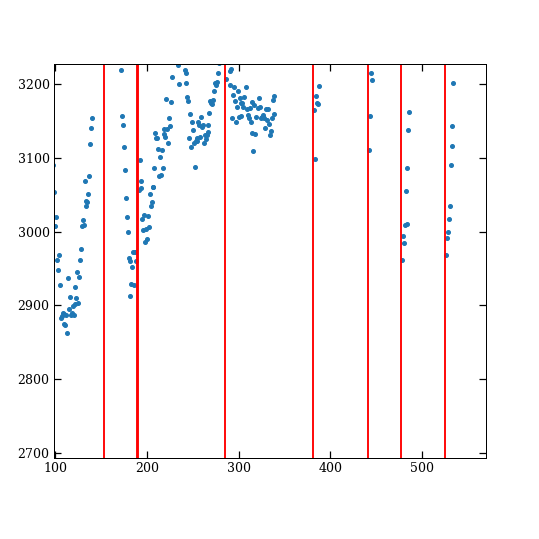

In [712]:
LC = np.nansum(Maskdata,axis=(1,2))
plt.figure()
plt.plot(LC,'.')
Lines = thrusters[thrusters+ 1 & Qual[thrusters+1]==0]
for i in Lines:
    plt.axvline(i,color = 'red')
#plt.ylim(0,10);

In [669]:
eventtime[events==1743]

array([[1743, 1875]])

In [670]:
eventtime[events==1743]
eventthrust = thrusters[(thrusters >= 1743) & (thrusters <= 1875)]
eventthrust

array([1773, 1821, 1857])

In [676]:
eventthrust[(Qual[eventthrust+1]==0)]+1 

array([1774, 1822, 1858])

In [674]:
(Qual[eventthrust+1]==0)

array([ True,  True,  True], dtype=bool)

In [665]:
np.nanmedian(LC[eventthrust+1 & (qual[eventthrust+1]==0)])

37.339152020215991

<IPython.core.display.Javascript object>


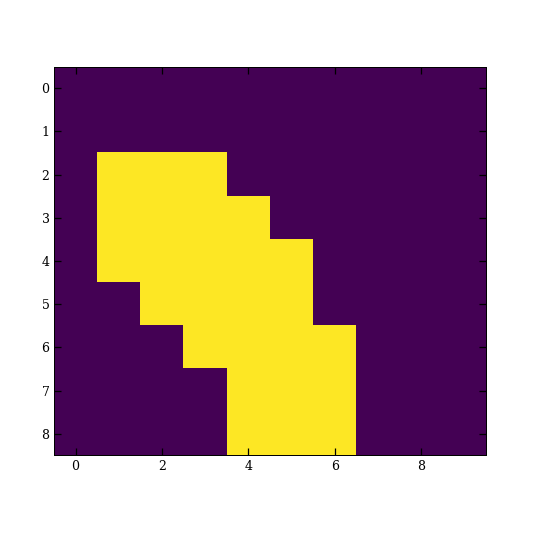

In [716]:
plt.figure()
plt.imshow(Eventmask[439],)

In [630]:
Position

[6, 2]

<IPython.core.display.Javascript object>


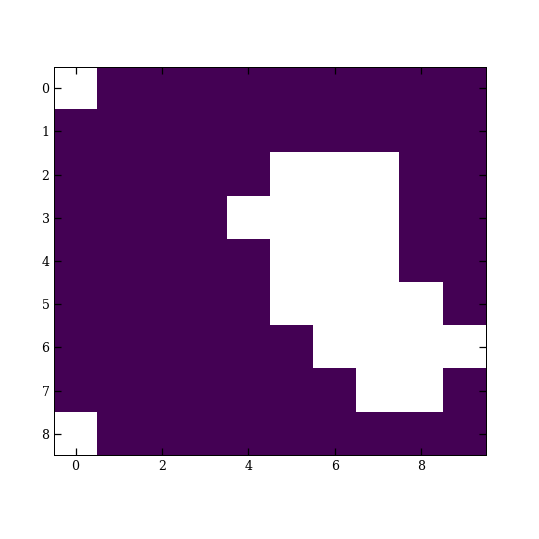

In [538]:
plt.figure()
plt.imshow(ObjectMask(datacube,Framemin))

<IPython.core.display.Javascript object>


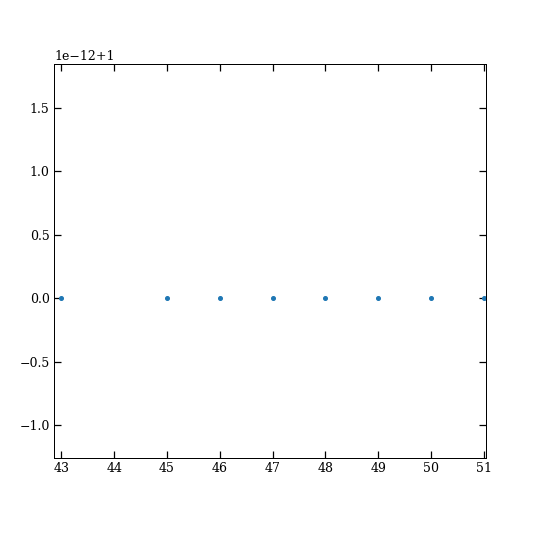

In [582]:
i =1039
LCC = np.nansum(Maskdata[(thrusters+1) & (Qual[thrusters+1]==0)],axis=(1,2))/np.nanmedian(np.nansum(Maskdata[(thrusters+1) & (Qual[thrusters+1]==0)],axis=(1,2)))
plt.figure()
plt.plot(LCC,'.')
#plt.xlim(i-50,i+100)
#plt.ylim(0,1000)

#for i in thrusters:
 #   plt.axvline(i,color = 'red')

In [575]:
np.nanstd(LCC)

1.3960196335987083

In [577]:
np.nanstd(LCC)

1078.691443922515

In [475]:

Times=eventtime
Masks=Eventmask
Events = []
times = []
mask = []
for i in range(len(events)):
    i =3
    # Check if there are multiple transients
    Coincident = Masks[events[i]]*framemask[events[i]]*1
    positions = np.where(Coincident == 1)
    print(positions)
    if len(positions[0]) >1:
        for p in range(len(positions[0])):
            eventmask = np.zeros((Masks.shape[1],Masks.shape[2]))
            eventmask[positions[0][p],positions[1][p]] = 1
            eventmask = convolve(eventmask,np.ones((3,3)),mode='constant', cval=0.0)
            Similar = np.where(Masks[Times[i][0]:,:,:]*eventmask == eventmask)[0]
            if len(Similar) > 0:
                timerange = [Similar[0]+Times[i][0]-1,Similar[-1]+Times[i][0]+1]
                if len(timerange) > 1:
                    Events.append(events[i])
                    times.append(timerange)
                    mask.append(eventmask)
    else:
        Events.append(events[i])
        times.append(Times[i])
        mask.append(Masks[events[i]])

(array([3, 4, 4, 5, 7, 8]), array([2, 3, 4, 4, 5, 5]))


In [508]:
obj

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True,  True,  True, False,
        False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False, False, False, False, False,  True,  True,  True, False,
        False],
       [False, False, False, False, False,  True,  True,  True,  True,
        False],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False]], dtype=bool)

In [469]:
Eventmask = (convolve(framemask,np.ones((1,3,3)),mode='constant', cval=0.0))*1
Eventmask[~np.where((convolve(Eventmask,np.ones((5,1,1)),mode='constant', cval=0.0) >= 4))[0]] = 0


<IPython.core.display.Javascript object>


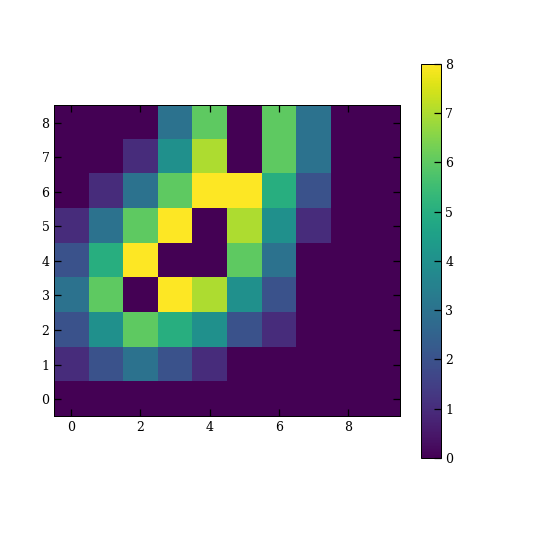

In [474]:
plt.figure()
plt.imshow(Coincident-9*framemask[events[3]],origin='lower')
plt.colorbar();

<IPython.core.display.Javascript object>


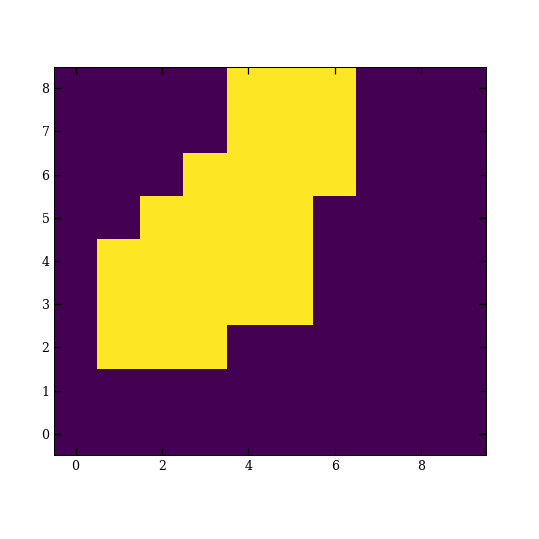

In [443]:
plt.figure()
plt.imshow((convolve(framemask[events[3]]*1,np.ones((3,3)),mode='constant', cval=0.0))*1>0,origin='lower')

<IPython.core.display.Javascript object>


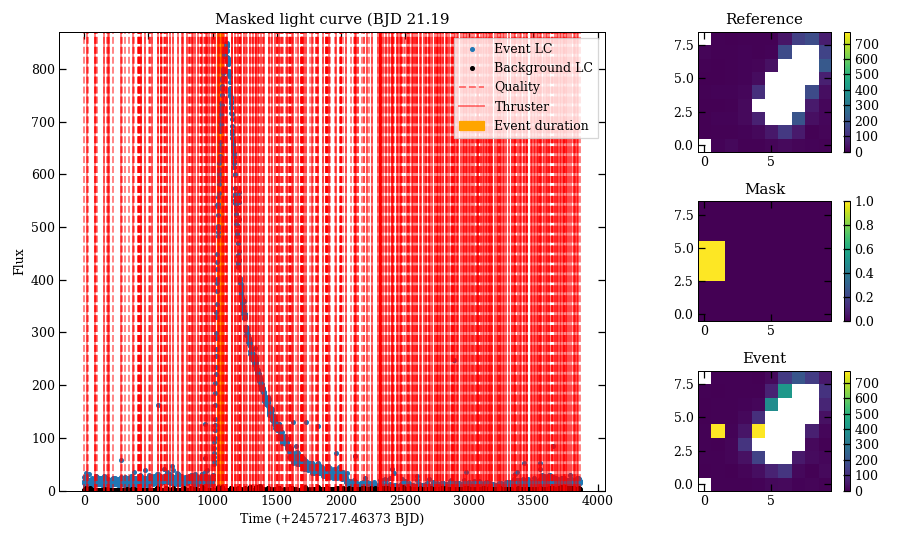

<IPython.core.display.Javascript object>


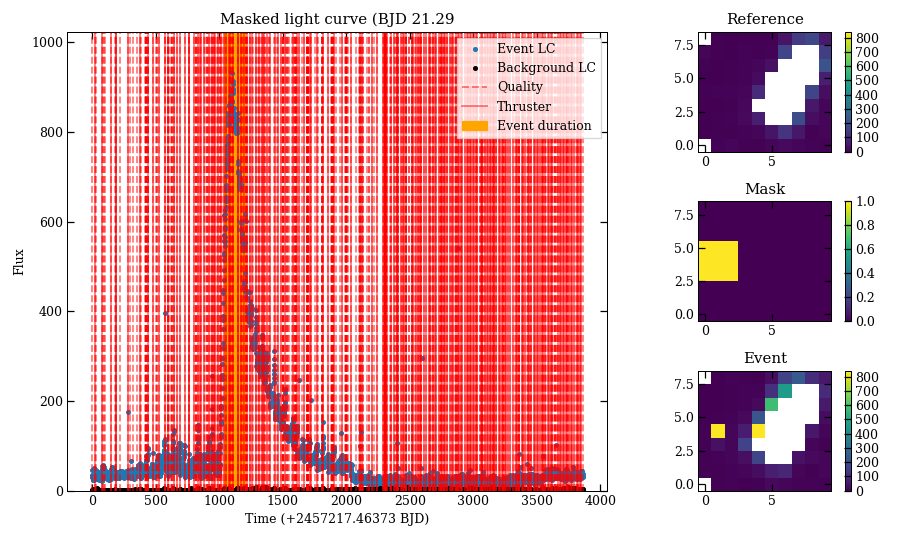

In [869]:
plt.close()
counter = 0
for i in range(len(events)):
    # Check if there are multiple transients
    #Find Coords of transient
    position = np.where(eventmask[i])
    middle = int(np.ceil(np.nansum(eventmask[i])/2))
    

    # Generate a light curve from the transient masks
    LC = np.nansum(Maskdata*eventmask[i], axis = (1,2))
    BG = Maskdata*~Eventmask[events[i]]
    BG[BG <= 0] =np.nan
    BGLC = np.nanmedian(BG, axis = (1,2))

    maxcolor = np.nanmax(Maskdata[eventtime[i][0]:eventtime[i][-1]]*eventmask[i])

    fig = plt.figure(figsize=(10,6))
    # set up subplot grid
    gridspec.GridSpec(3,3)

    # large subplot
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
    plt.title('Masked light curve (BJD '+str(round(time[eventtime[i][0]]-time[0],2)))
    plt.xlabel('Time (+'+str(time[0])+' BJD)')
    plt.ylabel('Flux')
    plt.plot(LC,'.', label = 'Event LC')
    plt.plot(BGLC,'k.', label = 'Background LC')
    plt.axvspan(eventtime[i][0],eventtime[i][-1], color = 'orange', label = 'Event duration')
    plt.axvline(quality[0],color = 'red', linestyle='dashed',label = 'Quality', alpha = 0.5)
    for j in range(quality.shape[0]-1):
        j = j+1 
        plt.axvline(quality[j], linestyle='dashed', color = 'red', alpha = 0.5)
    # plot Thurster firings 
    plt.axvline(thrusters[0],color = 'red',label = 'Thruster', alpha = 0.5)
    for j in range(thrusters.shape[0]-1):
        j = j+1 
        plt.axvline(thrusters[j],color = 'red', alpha = 0.5)
    xmin = eventtime[i][0]#-(eventtime[i][-1]-eventtime[i][0])/10
    xmax = eventtime[i][-1]#+(eventtime[i][-1]-eventtime[i][0])/10
    if xmin < 0:
        xmin = 0
    if xmax > time[-1] - time[0]:
        xmax = time[-1] - time[0]
    #plt.xlim(xmin,xmax) # originally 48 for some reason
    plt.ylim(0,np.nanmax(LC[eventtime[i][0]:eventtime[i][-1]])+0.1*np.nanmax(LC[eventtime[i][0]:eventtime[i][-1]]))
    plt.legend(loc = 1)
    # small subplot 1 Reference image plot
    plt.subplot2grid((3,3), (0,2))
    plt.title('Reference')
    plt.imshow(Maskdata[Framemin,:,:], origin='lower',vmin=0,vmax = maxcolor)
    plt.colorbar()
    # small subplot 2 Event mask
    plt.subplot2grid((3,3), (1,2))
    plt.title('Mask')
    plt.imshow(eventmask[i], origin='lower')
    plt.colorbar()
    # small subplot 3 Image of event
    plt.subplot2grid((3,3), (2,2))
    plt.title('Event')
    plt.imshow(Maskdata[np.where(Maskdata*eventmask[i]==np.nanmax(Maskdata[eventtime[i][0]:eventtime[i][-1]]*eventmask[i]))[0][0],:,:], origin='lower',vmin=0,vmax = maxcolor)
    plt.colorbar()
    if eventmask.shape[0] == 1 or eventmask.shape[1] == 1:
        plt.xticks([-0.5,0,0.5],['',0,''])
    # fit subplots and save fig
    fig.tight_layout()
    #fig.set_size_inches(w=11,h=7)
    #plt.savefig(save+pixelfile.split('/')[-1].split('-')[0]+'_'+str(counter)+'.pdf', bbox_inches = 'tight');


In [263]:
i = 27
begining = thrusters[(thrusters >= eventtime[i][0]-3) & (thrusters <= eventtime[i][0]+3)]
if len(begining) == 0:
    begining = Qual[(Qual >= eventtime[i][0]-1) & (Qual <= eventtime[i][0]+1)]
end = thrusters[(thrusters >= eventtime[i][-1]-3) & (thrusters <= eventtime[i][-1]+3)]
if len(end) == 0:
    end = Qual[(Qual >= eventtime[i][-1]-1) & (Qual <= eventtime[i][-1]+1)]
eventthrust = thrusters[(thrusters >= eventtime[i][0]) & (thrusters <= eventtime[i][-1])]

LC = np.nansum(Maskdata*eventmask[i], axis = (1,2))
maxloc = Smoothmax(eventtime[i],LC,Qual)

if ((maxloc > begining+1) & (maxloc < end-1)): 
    if (Real_position*Masks[i]).any():
        print('TL2')
    premean = np.nanmean(LC[eventthrust-1]) 
    poststd = np.nanstd(LC[eventthrust+1])
    postmean = np.nanmedian(LC[eventthrust+1])
    Outsidethrust = Firings[(thrusters < eventtime[i][0]) | (thrusters > eventtime[i][-1]+20)]
    Outsidemean = np.nanmedian(LC[Outsidethrust+1])
    Outsidestd = np.nanstd(LC[Outsidethrust+1])
    if (Real_position*Masks[i]).any():
        print(postmean)
        print(Outsidemean)
        print(Outsidestd)
    if  postmean > Outsidemean+2*Outsidestd:
        print('thing')

ValueError: `bins` should be a positive integer.

<IPython.core.display.Javascript object>


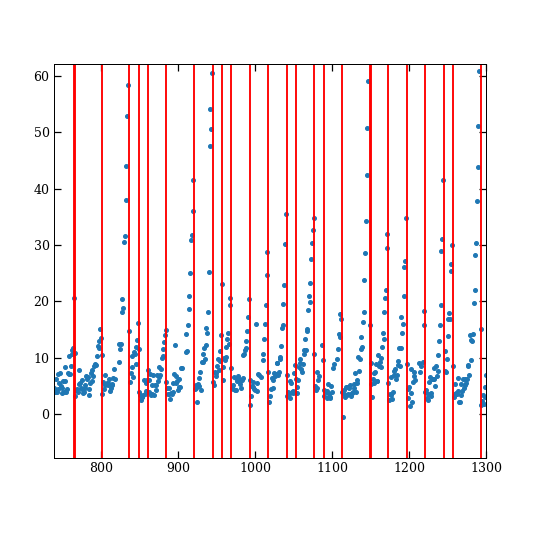

In [731]:
LCC = Maskdata[:,7,4]#np.nansum(Maskdata*eventmask[3],axis=(1,2))
plt.figure()
plt.plot(LCC,'.')
for i in thrusters:
    plt.axvline(i,color = 'red')

<IPython.core.display.Javascript object>


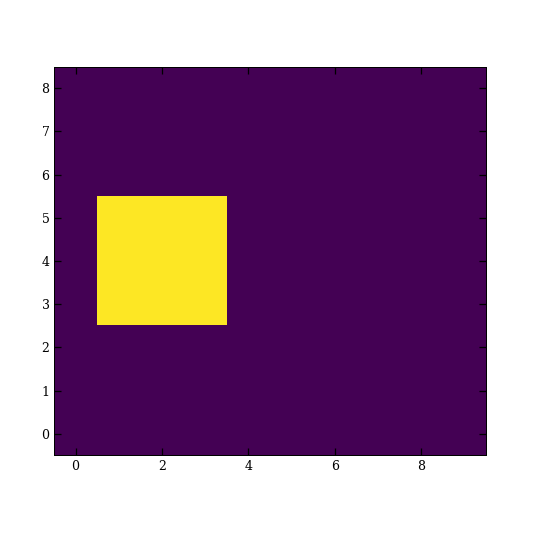

In [294]:
plt.figure()
plt.imshow(Eventmask[1108],origin='lower')

In [295]:
np.where(np.nansum((Eventmask[1108]*Eventmask)*1.,axis=(1,2)) == np.nansum(Eventmask[1108]*1))

(array([1039, 1040, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050,
        1051, 1052, 1054, 1055, 1056, 1058, 1059, 1060, 1061, 1062, 1063,
        1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
        1075, 1076, 1078, 1079, 1080, 1081, 1082, 1088, 1090, 1091, 1092,
        1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1108, 1110,
        1111, 1112, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
        1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
        1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
        1145, 1146, 1147, 1148, 1151, 1152, 1153, 1154, 1155, 1156, 1157,
        1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168,
        1169, 1170, 1171, 1172, 1174, 1176, 1177, 1178, 1179, 1180, 1181,
        1182, 1183, 1185, 1186, 1187, 1188, 1190, 1191, 1192, 1193, 1194,
        1195]),)

<IPython.core.display.Javascript object>


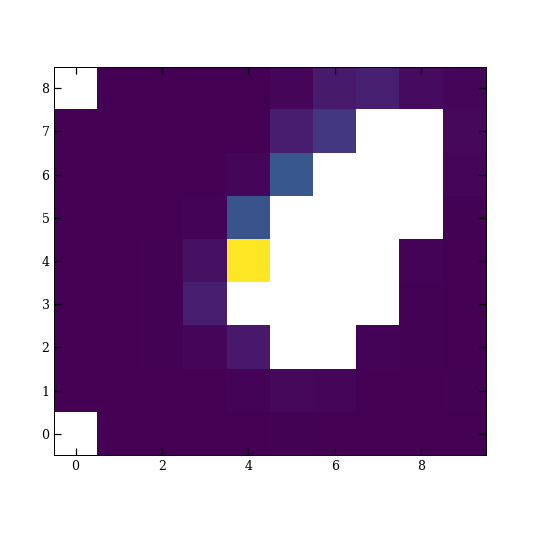

In [727]:
plt.figure()
plt.imshow(Maskdata[1108],origin='lower')

<IPython.core.display.Javascript object>


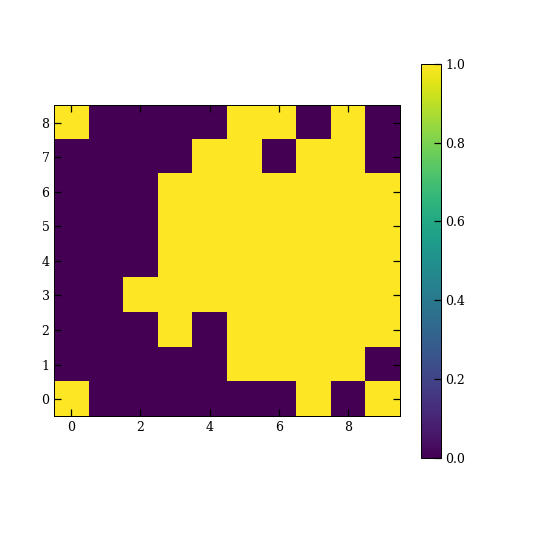

<IPython.core.display.Javascript object>


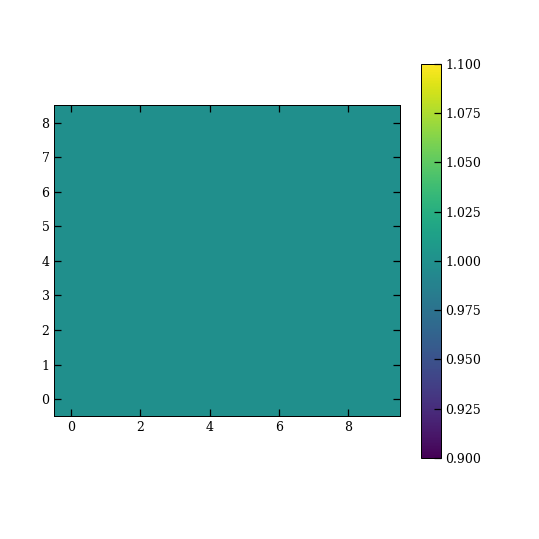

<IPython.core.display.Javascript object>


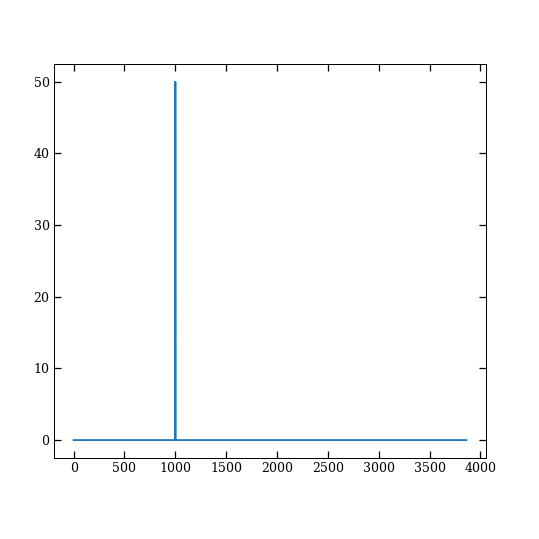

In [854]:
Fails = np.zeros((data.shape[1],data.shape[2]))
Seed = np.zeros((data.shape[1],data.shape[2]))
Failtime = np.zeros(data.shape[0])
for i in range(len(Result[0])):
    Seed[positions[i][0],positions[i][1]] +=1
    if Result[0,i] == 0:
        Fails[positions[i][0],positions[i][1]] +=1
        Failtime[starts[i]] += 1
        
plt.figure()
plt.imshow(Fails/Seed,origin='lower')
plt.colorbar()

plt.figure()
plt.imshow(Seed,origin='lower')
plt.colorbar()


plt.figure()
plt.plot(Failtime)

In [166]:
len(positions)

100

In [161]:
Result[0,1]

1.0

In [ ]:
a.